## 基本概念

### 概念說明

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x = torch.tensor([3.0])  # 蘋果單價
y = torch.tensor([18.0]) # 我們的預算
a = torch.tensor([1.0], requires_grad=True)  # 追蹤導數
print('grad:', a.grad)
loss = y - (a * x)  # loss function ( 中文稱 損失函數 )
loss.backward()
print('grad:', a.grad)

grad: None
grad: tensor([-3.])


### 優化器

In [2]:
for _ in range(100):
    a.grad.zero_()
    loss = y - (a * x)
    loss.backward()
    with torch.no_grad():
        a -= a.grad * 0.01 * loss

### 使用內建 loss function 與 optimizer

In [3]:
x = torch.tensor([3.0, 5.0, 6.0,])   # 不同種蘋果售價
y = torch.tensor([18.0, 18.0, 18.0]) # 我們的預算
a = torch.tensor([1.0, 1.0, 1.0], requires_grad=True) # 先假設都只能買一顆
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD([a], lr=0.01)
for _ in range(1000):
    optimizer.zero_grad()
    loss = loss_func(y, a * x)
    loss.backward()
    optimizer.step()
print('a:', a)

a: tensor([6.0000, 3.6000, 3.0000], requires_grad=True)


### 線性迴歸與矩陣範例 — Model 概念

#### 先用**sklearn**產生假資料

In [4]:
from sklearn.datasets import make_regression
np_x, np_y = make_regression(n_samples=500, n_features=10)
x = torch.from_numpy(np_x).float()
y = torch.from_numpy(np_y).float()

#### 建立Model

In [5]:
w = torch.randn(10, requires_grad=True)
b = torch.randn(1, requires_grad=True)
optimizer = torch.optim.SGD([w, b], lr=0.01)
def model(x):
    return x @ w + b

#### 先預測並畫出來

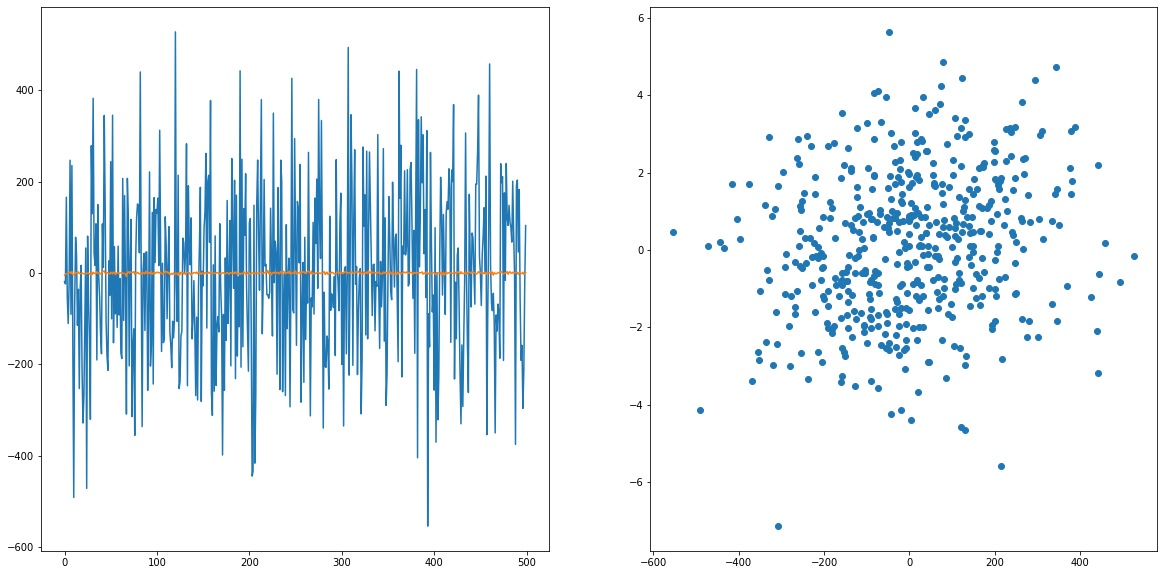

In [6]:
predict_y = model(x)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(y)
plt.plot(predict_y.detach().numpy())
plt.subplot(1, 2, 2)
plt.scatter(y.detach().numpy(), predict_y.detach().numpy())
plt.show()

- 左圖是資料範圍，兩條線看起來應該要一樣
- 右圖是原始資料及預測資料分布，應該是要一條左下到右上的直線

#### 開始訓練

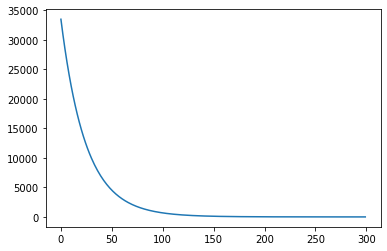

In [7]:
loss_func = torch.nn.MSELoss() # 之前提過的 loss function 
history = []   # 紀錄 loss（誤差/損失）的變化
for _ in range(300):   # 訓練 300 次
    predict_y = model(x)
    loss = loss_func(predict_y, y)
    # 優化與 backward 動作，之前介紹過
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    history.append(loss.item())
plt.plot(history)
plt.show()

可以看到loss隨訓練次數下降，表示model有學到東西

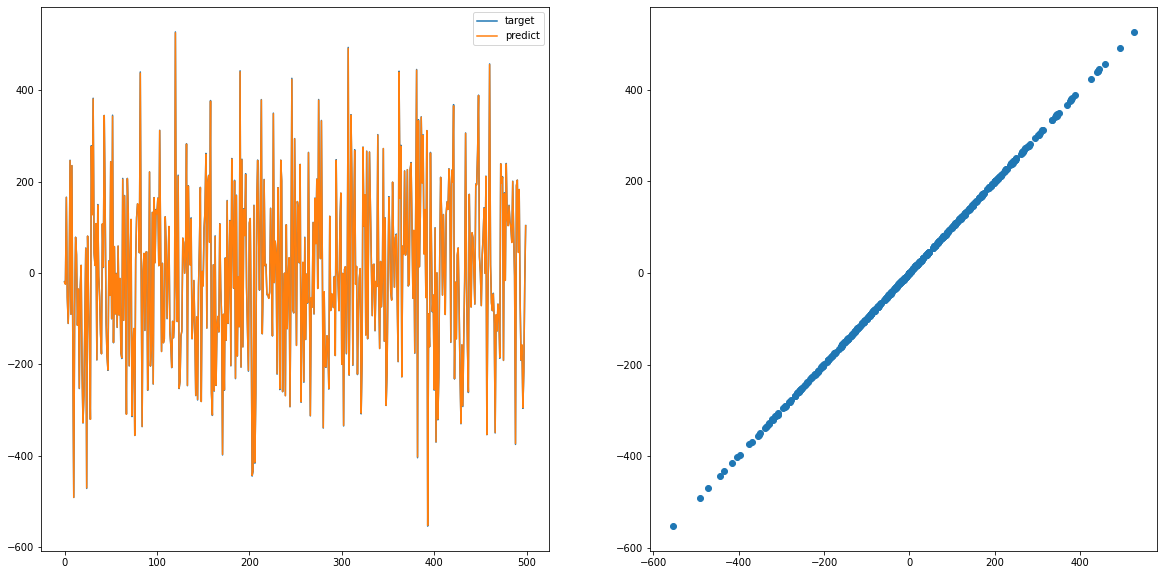

In [8]:
predict_y = model(x)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(y, label='target')
plt.plot(predict_y.detach().numpy(), label='predict')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y.detach().numpy(), predict_y.detach().numpy())
plt.show()